In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文显示
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 1. 读取数据

In [3]:
# 读取csv 文件并指定数据类型
file_path = '../../data/周一所获数据/所有OpenId的学习结束时间相同的记录.csv'
df = pd.read_csv(file_path,
                 # pandas 会自动推断多种日期类型
                 parse_dates=['date', 'earliestStartTime', 'latestEndTime'])
# 查看数据
df.dtypes

date                 datetime64[ns]
earliestStartTime    datetime64[ns]
latestEndTime        datetime64[ns]
trainingPersonId             object
dtype: object

In [4]:
df.head()

,date,earliestStartTime,latestEndTime,trainingPersonId
0,2024-07-01,2024-07-01 08:52:05,2024-07-01 13:54:02,21c0db9d10a811ec8871b07b25146e9e
1,2024-07-01,2024-07-01 09:00:48,2024-07-01 13:54:02,e3dc32c571b611ecb369fa164011f743
2,2024-07-01,2024-07-01 10:59:23,2024-07-01 13:54:04,c94b96dc10ab11ec8871b07b25146e9e
3,2024-07-01,2024-07-01 13:31:22,2024-07-01 13:54:04,ade8315610a911ec8871b07b25146e9e
4,2024-07-01,2024-07-01 15:37:53,2024-07-01 15:43:38,a6e90bc4307f11ecb7eafa164011f743


# 2. 数据清洗
类型转换在读取 csv 文件时已经完成，这里不需要再次转换。
### (1) 单位转换


### (2) 排序


### (3) 分组聚合
按照每个结束学习的时间戳进行分组，统计每个时间戳的 `trainingPersonId` 数量

In [16]:
df_grouped = df.groupby('latestEndTime').agg(latestEndTime=('latestEndTime', 'mean'),openIdCount=('latestEndTime', 'count'))

# 3. 绘制图表 

In [17]:
# 中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

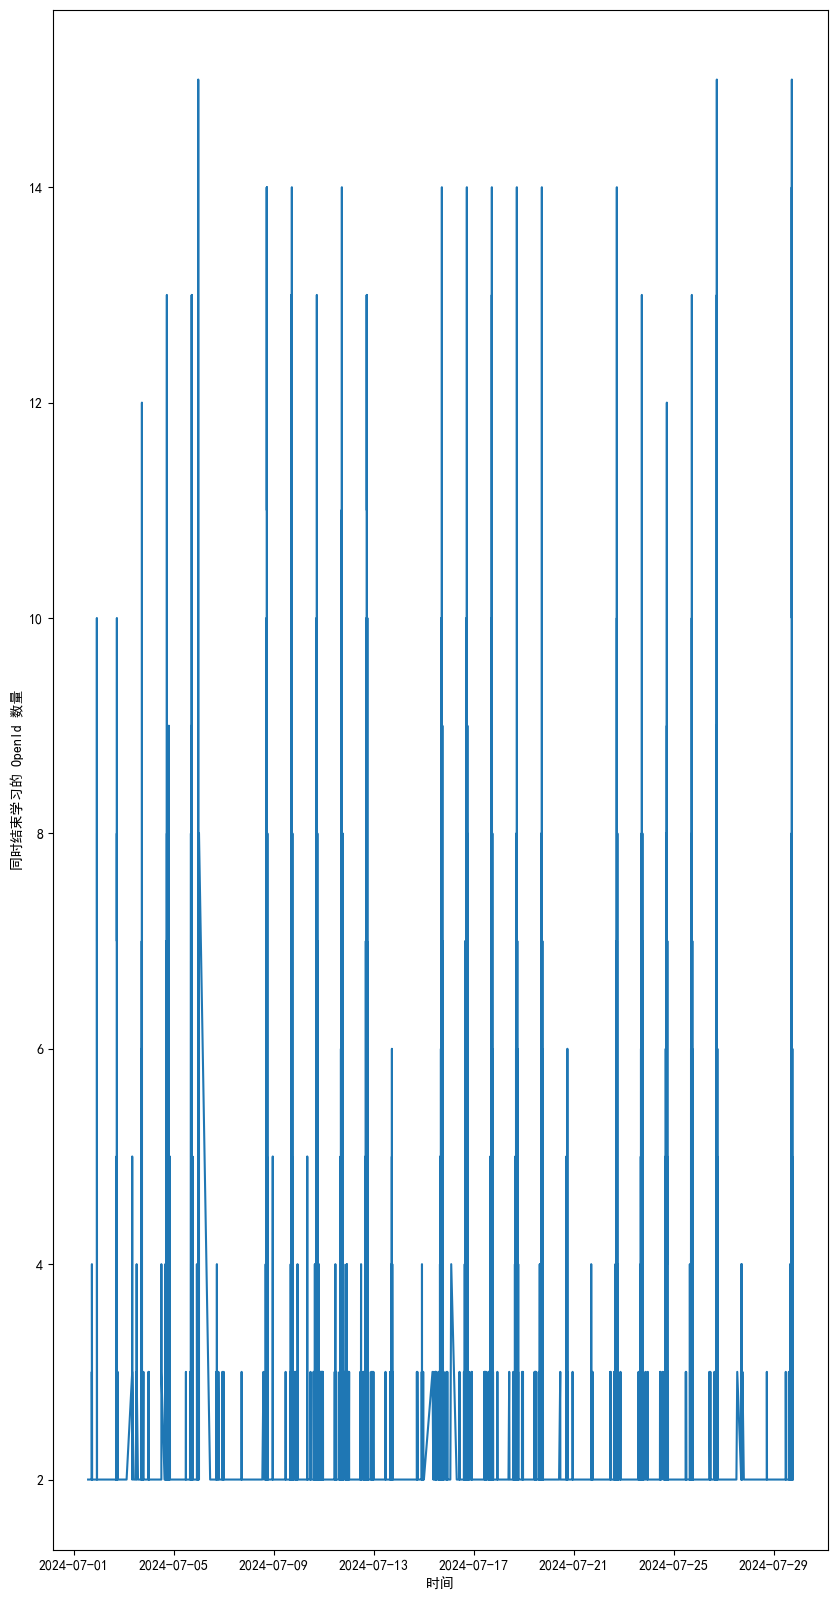

In [26]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))

num_elements = 5000
total_rows = df_grouped.shape[0]

# x 轴不需要打印每一条 id，只需要打印刻度
ax.plot(df_grouped.head(total_rows).latestEndTime, 
       df_grouped.head(total_rows).openIdCount)

# 设置标题
ax.set_xlabel('时间')
ax.set_ylabel('同时结束学习的 OpenId 数量')

# 设置 x 轴刻度
# ticks = np.arange(0, total_rows, 1000)
# labels = [f"{df_grouped['latestEndTime'].iloc[t]}" for t in ticks if t < total_rows] # 只打印几个时间戳作为刻度
# plt.xticks(ticks[:len(labels)], labels,rotation=45)

# 设置 y 轴刻度精度
# plt.yticks(np.arange(0, 100, 5))

plt.savefig('../../imgs/所有学员的 OpenId 使用情况6-6.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()

### 附注: 中文字体设置

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 黑体（宋体？） SimHei
# 微软雅黑 Microsoft YaHei
# 微软正黑体 Microsoft JHengHei
# 新宋体 NSimSun
# 新细明体 PMingLiU
# 细明体 MingLiU
# 标楷体 DFKai-SB
# 仿宋 FangSong
# 楷体 KaiTi
# 仿宋-GB2312 FangSong_GB2312
# 楷体-GB2312 KaiTi_GB2312

# font.sans-serif : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
# ‘font.family’ 用于显示字体的名字
# ‘font.style’ 字体风格，正常’normal’ 或斜体’italic’
# ‘font.size’ 字体大小，整数字号或者’large’ ‘x-small’
